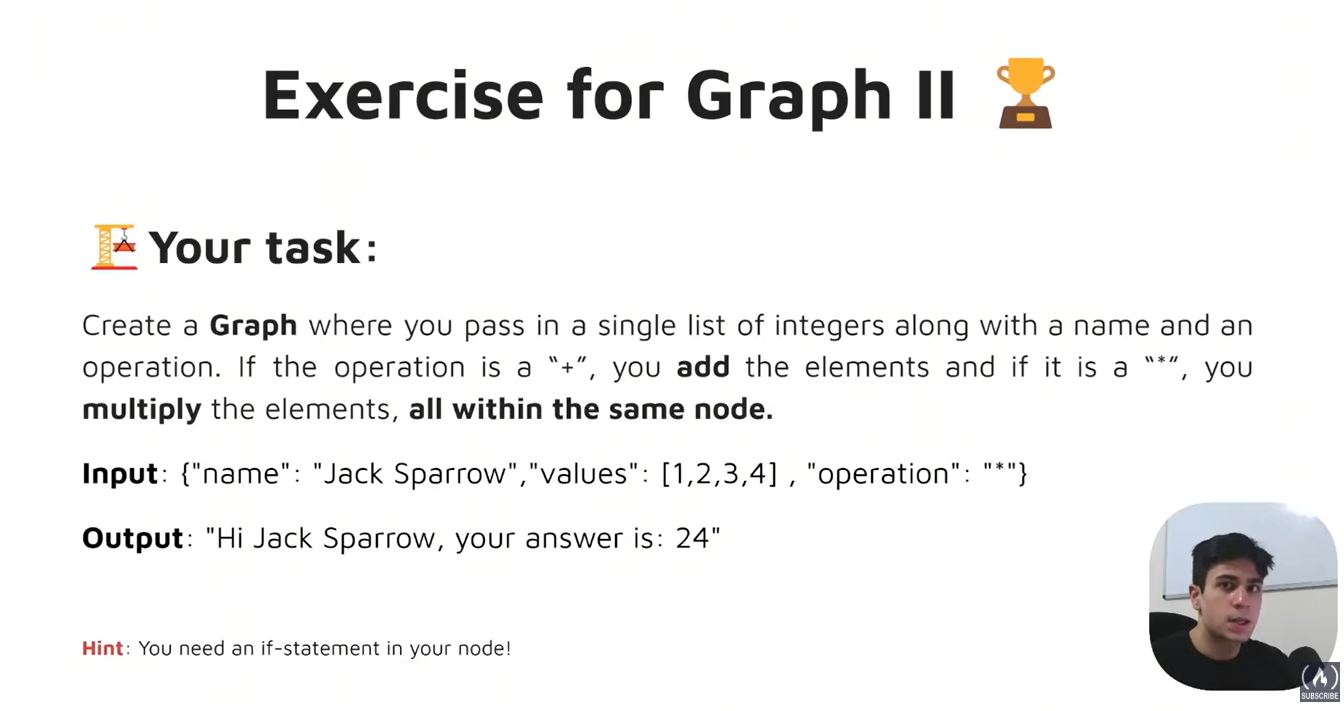

In [1]:
from typing import TypedDict,List
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    values: List[int]
    operation: str 
    result: str   

In [7]:
def operation_node(state: AgentState) -> AgentState:

    if state['operation'] == "*":
        output = 1
        for i in state['values']:
            output = output * i

        state['result'] = f" Hi {state['name']}, your answer is {output}"

    elif state['operation'] == "+":
        state['result'] = f" Hi {state['name']}, your answer is {sum(state['values'])}"

    else:

        state['result'] = f" Hi {state['name']}, you have given an invalid operation"


    return state

In [8]:
graph = StateGraph(AgentState)

graph.add_node("operator", operation_node)

graph.set_entry_point("operator")

graph.set_finish_point("operator")

agent = graph.compile()

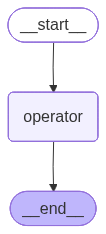

In [9]:
agent

In [10]:
agent.invoke(input={
    "name": "Ishaan",
    "values": [1,2,3,4],
    "operation": "*"
    
})

{'name': 'Ishaan',
 'values': [1, 2, 3, 4],
 'operation': '*',
 'result': ' Hi Ishaan, your answer is 24'}

In [11]:
agent.invoke(input={
    "name": "Ishaan",
    "values": [1,2,3,4],
    "operation": "+"
    
})

{'name': 'Ishaan',
 'values': [1, 2, 3, 4],
 'operation': '+',
 'result': ' Hi Ishaan, your answer is 10'}

In [12]:
agent.invoke(input={
    "name": "Ishaan",
    "values": [1,2,3,4],
    "operation": "-"
    
})

{'name': 'Ishaan',
 'values': [1, 2, 3, 4],
 'operation': '-',
 'result': ' Hi Ishaan, you have given an invalid operation'}